In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

In [10]:
#name = 'chess.dat'
name = 'mushroom.dat'

dataset = name

data = pd.read_csv(dataset, sep=' ', header=None)
data.fillna(0,inplace=True)
data=data.astype(int)
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,3,9,13,23,25,34,36,38,40,...,67,76,85,86,90,93,98,107,113,0
1,2,3,9,14,23,26,34,36,39,40,...,67,76,85,86,90,93,99,108,114,0
2,2,4,9,15,23,27,34,36,39,41,...,67,76,85,86,90,93,99,108,115,0
3,1,3,10,15,23,25,34,36,38,41,...,67,76,85,86,90,93,98,107,113,0
4,2,3,9,16,24,28,34,37,39,40,...,67,76,85,86,90,94,99,109,114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,...,73,83,85,88,90,93,106,112,119,0
8120,2,3,9,13,24,28,35,36,39,50,...,73,83,85,87,90,93,106,110,119,0
8121,2,6,9,13,24,28,35,36,39,41,...,73,83,85,88,90,93,106,112,119,0
8122,1,7,10,13,24,31,34,36,38,48,...,67,76,85,86,90,94,102,110,119,0


In [11]:
row = len(data)
col = len(data.values[0])
#print(row, col)

In [12]:
records_List = []
for i in range(0, row):
    records_List.append([
                        int(data.values[i,j])
                        for j in range(0, col)
                            if (int(data.values[i,j]) != 0)
                       ])
#records_List

In [13]:
te = TransactionEncoder()
te_ary = te.fit(records_List).transform(records_List)
dataX = pd.DataFrame(te_ary, columns=te.columns_)
dataX = dataX.astype(int)
dataX

,1,2,3,4,5,6,7,8,9,10,...,110,111,112,113,114,115,116,117,118,119
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8120,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
8121,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
8122,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [14]:
apriori(dataX, min_support=0.8)

,support,itemsets
0,0.974151,(33)
1,0.838503,(35)
2,1.000000,(84)
3,0.975382,(85)
4,0.921713,(89)
5,0.812654,"(33, 35)"
6,0.974151,"(33, 84)"
7,0.973166,"(33, 85)"
8,0.898080,"(89, 33)"
9,0.838503,"(35, 84)"


In [15]:
threshold = 1
total_Time = []
threshold_value = []

for i in range(0,8):
    begin = time.time()
    result = apriori(dataX, min_support=threshold)
    end = time.time()
    total_Time.append(end-begin)
    threshold_value.append(threshold)
    threshold -= 0.1
    print(begin,end)
total_Time
#threshold_value

1632149285.3452723 1632149285.3622267
1632149285.3622267 1632149285.3741922
1632149285.3751972 1632149285.3871546
1632149285.3871546 1632149285.3991227
1632149285.3991227 1632149285.4150803
1632149285.4150803 1632149285.4410107
1632149285.4420078 1632149285.609562
1632149285.6105592 1632149286.8642063


[0.016954421997070312,
 0.011965513229370117,
 0.011957406997680664,
 0.011968135833740234,
 0.01595759391784668,
 0.025930404663085938,
 0.16755414009094238,
 1.2536470890045166]

In [16]:
print(total_Time)
print(threshold_value)

[0.016954421997070312, 0.011965513229370117, 0.011957406997680664, 0.011968135833740234, 0.01595759391784668, 0.025930404663085938, 0.16755414009094238, 1.2536470890045166]
[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016]


-->**Mushroom**

[0.03118300437927246, 0.02501201629638672, 0.02875804901123047, 0.033854007720947266, 0.032987356185913086, 0.047569990158081055, 0.22492480278015137, 1.697321891784668, 38.04698634147644, 673.4689807891846]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

-->**Chess**

[1.6181080341339111, 0.09707427024841309, 1.2204933166503906, 11.597933530807495, 80.61982703208923, 485.0883479118347, 2416.4272072315216]

[1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show(close=None, block=None)>

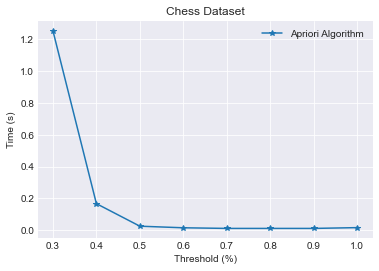

In [18]:
plt.style.use('seaborn-darkgrid')

plt.plot(threshold_value, total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Apriori Algorithm'], loc='upper right')
plt.show

In [10]:
#Mushroom
#apM_total_Time = [0.25842881202697754, 0.10440802574157715, 0.1211397647857666, 0.10687017440795898, 0.12969374656677246, 0.1438894271850586, 0.1778252124786377, 0.23185992240905762, 0.5937631130218506, 4.875962972640991]
#apM_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013, 0.30000000000000016, 0.20000000000000015, 0.10000000000000014]

#Chess
#apC_total_Time = [0.03931140899658203, 0.07153558731079102, 0.2961697578430176, 1.0832898616790771, 4.8713319301605225, 20.427759408950806, 96.04614901542664]
#apC_threshold_value = [1, 0.9, 0.8, 0.7000000000000001, 0.6000000000000001, 0.5000000000000001, 0.40000000000000013]

<function matplotlib.pyplot.show>

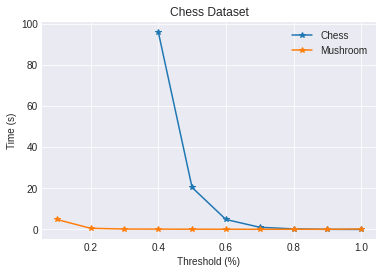

In [ ]:
plt.style.use('seaborn-darkgrid')

plt.plot(apC_threshold_value, apC_total_Time, '-*')
plt.plot(apM_threshold_value, apM_total_Time, '-*')
plt.title('Chess Dataset')
plt.xlabel('Threshold (%)')
plt.ylabel('Time (s)')
plt.legend(['Chess', 'Mushroom'], loc='upper right')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Apriori/Chess_Mushroom_FP-Growth.pdf', dpi=300, bbox_inches='tight')
plt.show